# FISH - Pipeline - A Python notebook to simulate FISH data

```
Author: Luis U. Aguilera
Contact Info: luis.aguilera@colostate.edu

Copyright (c) 2021 Munsky Group 
Colorado State University 
Licensed under BSD 3-Clause License.
```

### Libraries

In [1]:
# Importing libraries
import sys
import pathlib
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

### Path to source directories

In [2]:
# Defining directories
current_dir = pathlib.Path().absolute()
fa_dir = current_dir.parents[0].joinpath('src')
# Importing fish_analyses module
sys.path.append(str(fa_dir))
import fish_analyses as fa


In [3]:
# initializing Microscope simulation 
cell_library_folder_path = current_dir.joinpath('cell_library')
list_library_cells, dataframe_cell_library, background_pixels_library = fa.MicroscopeSimulation().initialize(cell_library_folder_path)

___

# Function to simulate cell positions

In [4]:
image_size_Y_X = [5000,5000]
number_of_cells_in_simulation = 100
simulation_dataframe,complete_image_size_Z_Y_X = fa.MicroscopeSimulation().generate_simulated_positions(image_size_Y_X,number_of_cells_in_simulation,list_library_cells,dataframe_cell_library)
simulation_dataframe.tail()

,start_y_position,start_x_position,centroid_y,centroid_x,z_size,y_size,x_size,nucleus_area,number_of_spots,ts_size_0,ts_size_1,ts_size_2,ts_size_3,library_id
95,4223,3666,4281,3703,27,117,75,6488,348,26,0,0,0,31
96,4080,4404,4116,4457,27,72,106,5381,244,82,0,0,0,16
97,4295,1146,4338,1194,27,86,97,6448,377,52,0,0,0,46
98,4045,1768,4099,1804,27,108,72,4731,65,0,0,0,0,76
99,4305,2338,4357,2379,27,105,82,6389,309,62,0,0,0,47


# Generate simulation on demand

z-position:  -4
mean int ch:  0   668.2953125
mean int ch:  1   773.2192556423611


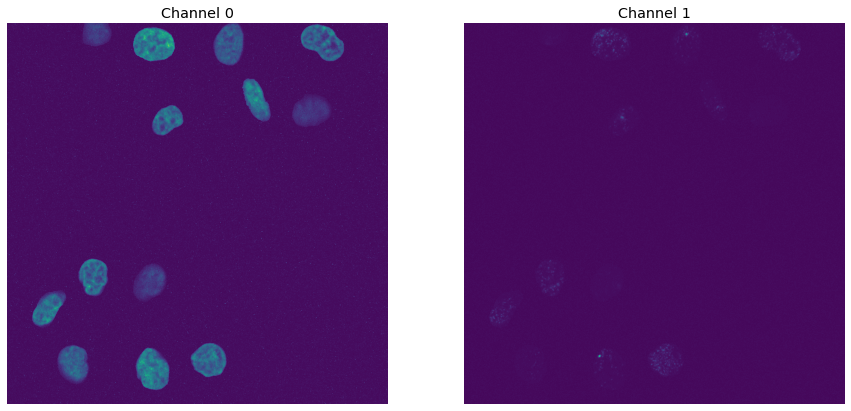

In [28]:
# Region to display
z_position = -4 #[-13:13]
y_position =  500
x_position = 1000
x_size = 960
y_size = 960
simulated_image,dataframe_cells_in_image = fa.MicroscopeSimulation().make_simulated_image(z_position, y_position, x_position, x_size, y_size, complete_image_size_Z_Y_X, simulation_dataframe, list_library_cells, background_pixels_library)
# Plotting
number_color_channels = simulated_image.shape[2]
fig, ax = plt.subplots(1,number_color_channels, figsize=(15, 7))
# Plotting the heatmap of a section in the image
print('z-position: ', str(z_position))
for i in range (number_color_channels):
    simulated_image_removed_extreme_values = simulated_image[:,:,i]#fa.RemoveExtrema(simulated_image[:,:,i],min_percentile=0, max_percentile=99.9).remove_outliers()  #np.max(simulated_image[:,:,:,i],axis = 0)
    ax[i].imshow(simulated_image_removed_extreme_values);ax[i].set(title='Channel '+ str(i)); ax[i].axis('off');ax[i].grid(False)
    #print('mean int ch: ',str(i),' ' , np.mean(simulated_image_removed_extreme_values))
plt.show()


In [6]:
dataframe_cells_in_image

,start_y_position,start_x_position,centroid_y,centroid_x,z_size,y_size,x_size,nucleus_area,number_of_spots,ts_size_0,ts_size_1,ts_size_2,ts_size_3,library_id
0,2335,1890,2380,1922,27,91,64,4348,232,36,9,0,0,6
1,1839,1377,1890,1420,27,102,86,5920,271,69,0,0,0,36
2,2301,974,2342,1029,27,83,111,5828,305,8,0,0,0,34


300 2165
300 2000


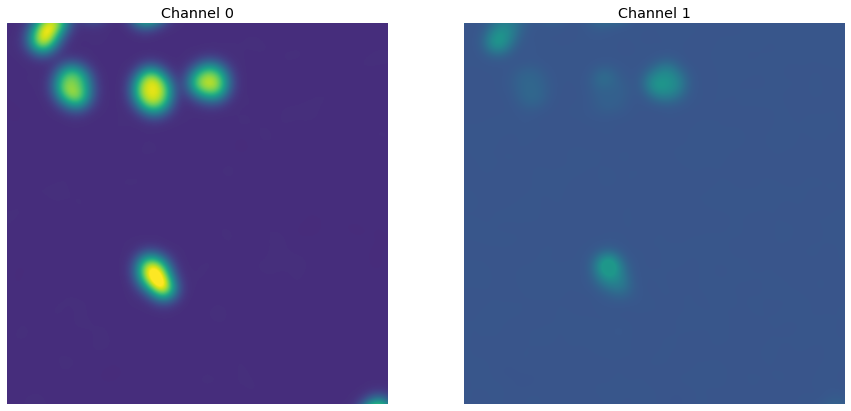

In [7]:
z_position = 15
y_position =  1200
x_position = 1000
x_size = 960
y_size = 960
simulated_image, dataframe_cells_in_image = fa.MicroscopeSimulation().make_simulated_image(z_position, y_position, x_position, x_size, y_size, complete_image_size_Z_Y_X, simulation_dataframe, list_library_cells, background_pixels_library)

# Plotting
number_color_channels = simulated_image.shape[2]
fig, ax = plt.subplots(1,number_color_channels, figsize=(15, 7))
# Plotting the heatmap of a section in the image
for i in range (number_color_channels):
    simulated_image_removed_extreme_values = fa.RemoveExtrema(simulated_image[:,:,i],min_percentile=0, max_percentile=99.9).remove_outliers()  #np.max(simulated_image[:,:,:,i],axis = 0)
    simulated_image_removed_extreme_values[0,0]=300
    simulated_image_removed_extreme_values[0,1]=2000
    ax[i].imshow(simulated_image_removed_extreme_values);ax[i].set(title='Channel '+ str(i)); ax[i].axis('off');ax[i].grid(False)
    print(np.min(simulated_image_removed_extreme_values),np.max(simulated_image_removed_extreme_values))
plt.show()


In [8]:
dataframe_cells_in_image

,start_y_position,start_x_position,centroid_y,centroid_x,z_size,y_size,x_size,nucleus_area,number_of_spots,ts_size_0,ts_size_1,ts_size_2,ts_size_3,library_id
0,1154,1361,1202,1404,27,96,86,6051,174,58,0,0,0,33
1,1361,1167,1411,1207,27,100,81,6311,117,0,0,0,0,84
2,1371,1367,1424,1410,27,107,86,6948,118,30,0,0,0,66
3,1220,1106,1267,1149,27,95,86,5010,310,59,0,0,0,52
4,1349,1508,1392,1553,27,86,90,5945,443,0,0,0,0,62
5,1839,1377,1890,1420,27,102,86,5920,271,69,0,0,0,36
